In [1]:
# libraries
library(reshape2)
library(ggplot2)

1.I

In [4]:
# the average function will return the average of the average of the neighbors’ values
average <- function(x){
    mean(x)
}

# distance function for type Manhattan
manhattan_neighbours <- function(train_data,x,k){
    # train the training data point
    # x is the average of the neighbors’ values
    # abs(train_data-x) manhattan distance formula
    train_index<-as.data.frame(sort(abs(train_data-x),index.return=TRUE))[1:k,2]
    return(train_index)
}

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3){
    # count number of test samples
    test.len <- length(test.data)
    # creating an empty vector of prediction labels
    pred.label <- vector()
    # for each test sample
    for (i in 1:test.len){
        # Finding its K nearest neighbours from training sampels...
        nn <- manhattan_neighbours(test.data[i],train.data,K)        
        # Calculating the predicted labels according to the average point
        pred.label[i] <- (average(train.label[nn]))
    }
        # returning the class labels as output
    return (pred.label)
}


# loading the train and test data set along with its labels
train<-read.csv("Task1A_train.csv")
test<-read.csv("Task1A_test.csv")
train.data<-train[,1]
train.label<-train[,2]
test.data<-test[,1]
test.label<-test[,2]

# running the knn function
knn(train.data, train.label, test.data, 3)

[1]  0.7233333  0.7233333  0.7933333  0.7500000  0.8533333  0.8233333
 [7]  0.9166667  0.9166667  1.0533333  1.1066667  1.2833333  1.2900000
[13]  1.5233333  1.5500000  1.7400000  1.6300000  1.9000000  2.0100000
[19]  2.4000000  2.5500000  3.0600000  3.3600000  3.8700000  4.2600000
[25]  4.7400000  5.1600000  5.7300000  6.0600000  6.5100000  6.6300000
[31]  7.2300000  7.5000000  7.9500000  8.5200000  9.1200000 10.3200000
[37] 11.1900000 12.6900000 13.6800000 15.0300000 15.6900000 15.6900000

1.II

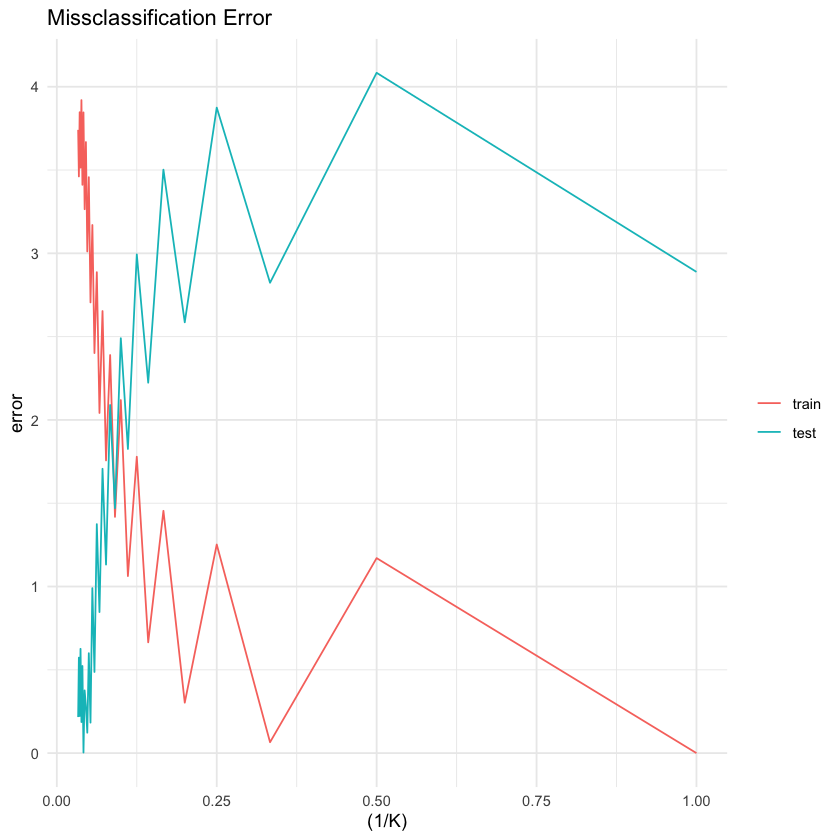

In [5]:
# error function
error <- function(label,pred_label){
#     standard error of the estimate 
    sqrt((sum(label - pred_label)^2)/length(label))
} 


# creating a data frame for the matched/unmatched labels (or errors)
miss_error <- data.frame('K'=1:30, 'train'=rep(0,30), 'test'=rep(0,30))


# for each k value
for (k in 1:30){
    # using the error function for each k value and storing in the data frame
    miss_error[k,'train'] <- error(train.label,knn(train.data, train.label, train.data, k))
    miss_error[k,'test'] <-  error(test.label,knn(train.data, train.label, test.data, k))
}

# reshaping for visualization
miss.m <- melt(miss_error, id='K') 
names(miss.m) <- c('K', 'type', 'error')
# plotting the test and train errors
ggplot(data=miss.m, aes(x=(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

1.III

In [6]:
# finding the optimum k value
# by finding the lowest error point for test set
min_error_k_test <- miss_error[which.min(miss_error$test),"K"]
min_error_k_test

[1] 24

1.IV

The optimum k value found is 24. This value is quite acceptable as we know from the plain thumb rule that for KNN regression/classification, initially its best to choose k value as half the length of the dataset. The length of the dataset here is 42 and its half is 24, hence k value of 24 is quite good.


When we increase K value, the training error increases while testing error decreses. However, in the plot above as we plotting the erro against 1/K, we see the training error decreses and the testing error increases, which should be the case as we are taking inverse of K. 
When we increase K, it has to choose more neighbours and the model becomes complex. 